Here we are generating a 10kHz sinewave @ 96kHz sampling rate and shifting its pitch up and down by the same ratio. Resulting signal is comared against the reference sinewave.

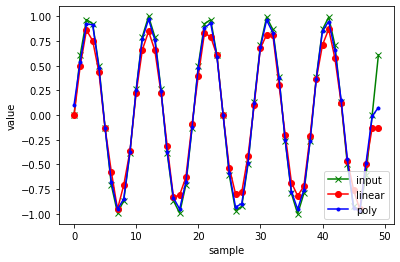

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pitchtools import *

Fs = 96_000
freq = 10_000
n_smp = 50
x = np.arange(n_smp)
sig = np.sin(2 * np.pi * freq * x / Fs)

ratio = 1.77
res = pitch_shift_linear(sig, ratio)
res1 = pitch_shift_linear(res, 1.0 / ratio)
res = pitch_shift_ovs2_poly_6p5o(sig, ratio)
res3 = pitch_shift_ovs2_poly_6p5o(res, 1.0 / ratio)

plt.plot(x, sig, 'gx-')
plt.plot(x, res1, 'ro-')
plt.plot(x, res3, 'b.-')
plt.xlabel('sample')
plt.ylabel('value')
plt.legend(['input', 'linear', 'poly'], loc='lower right')
plt.show()


The following cell processes a mono 96kHz .wav file using linear and polynomial interpolators.

In [1]:
# Pitch change ratio, e.g. 2.0 = "one octave up" 
RATIO = 1.05946 # one semitone up

import os
from scipy.io import wavfile
import scipy.io
from PyQt5 import QtGui, QtWidgets
from pitchtools import *

# Open file dialog and generate names for output files
app = QtWidgets.QApplication([dir])
fname_in, _ = QtWidgets.QFileDialog.getOpenFileName(None, "Input file", '.', filter="Wav files (*.wav)")
fname_out_linear = os.path.splitext(fname_in)[0] + ".linear.wav"
fname_out_poly = os.path.splitext(fname_in)[0] + ".poly.wav"

# Read and process .wav file
Fs, sig = wavfile.read(fname_in)
res_linear = pitch_shift_linear(sig, RATIO)
res_poly = pitch_shift_ovs2_poly_6p5o(sig, RATIO)
wavfile.write(fname_out_linear, Fs, res_linear)
wavfile.write(fname_out_poly, Fs, res_poly)
